# ISSUE 2

## imports

In [81]:
import os
from os.path import isfile
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pprint
import skimage.metrics
import matplotlib.pyplot as plt

## Parameters

In [82]:
param = {
    "path_base": "/home/ubuntu/miki/",
    "folders": ["d_in", "d_out"],    
    "url_video": "https://media.xiph.org/video/derf/y4m/galleon_422_qcif.y4m",
    "name_video": "galleon_422_qcif.y4m",     
    "limite": 5, 
    "T": 4, 
    "q_inicial": 2, 
    "q_step": 128, 
    "distorsion_metric": "MSE", 
    "predictor": 2,
    "quantizers" : ["midtread", "midrise", "deadzone"]    
}
resultados = {   
    "size_original" : 0,
    "q_step": []
}

## Functions

In [92]:
#Crear carpetas
#---------------------------------------------
def make_directories (di, do, c):
    for i in c:
        !mkdir {di}/{i}
        !mkdir {do}/{i}
        !cp {do}/*.* {do}/{i}/        

#Calcular los valores para q_step
#---------------------------------------------
def set_qstep(i_q_inicial, i_q_step):
    q_step_temp = []    
    i = i_q_inicial
    while i <= i_q_step:
        q_step_temp.append(i); i=i*2
    return q_step_temp

#Calcula el tamaño de una carpeta
def get_size(the_path):
    """Get size of a directory tree in bytes."""
    path_size = 0
    for path, dirs, files in os.walk(the_path):
        for fil in files:
            filename = os.path.join(path, fil)
            path_size += os.path.getsize(filename)
    return path_size

#Cuantificar las imágenes
#-------------------------------------------- 
def cuantificar(d_out, q, j, ii):
    !python3 ../tools/quantizeissue1.py -i {d_out}/LH{ii}.png -o {d_out}/{q}/{j}/LH{ii}.png -q {q} -c {j} 
    !python3 ../tools/quantizeissue1.py -i {d_out}/HL{ii}.png -o {d_out}/{q}/{j}/HL{ii}.png -q {q} -c {j} 
    !python3 ../tools/quantizeissue1.py -i {d_out}/HH{ii}.png -o {d_out}/{q}/{j}/HH{ii}.png -q {q} -c {j} 
    !python3 ../tools/quantizeissue1.py -i {d_out}/LL{ii}.png -o {d_out}/{q}/{j}/LL{ii}.png -q {q} -c {j} 

#Obtener las inversas
#---------------------------------------------
def get_inverse(d_out, q, j):
    !python3 -O MCDWT.py -P {param["predictor"]} -p {d_out}/{q}/{j}/ -b 
    !python3 -O MDWT.py -p {d_out}/{q}/{j}/ -b       
        
#Obtener MSE entre dos carpetas
#---------------------------------------------
def MSE(original, inversa):
    mse_temp = 0
    i = 0
    for a in os.listdir(original):
        if isfile(original + a):
            mse_temp += get_MSE(original + a, inversa + a)
            i += 1
    return(mse_temp / i)

#Obtener los pesos de las carpetas q y cuantificador
#---------------------------------------------
def get_sizes(d_out, cuantificador, q):
    p """Get size of a directory tree in bytes."""
    path_size = 0
    for path, dirs, files in os.walk(the_path):
        for fil in files:
            filename = os.path.join(path, fil)
            path_size += os.path.getsize(filename)
    return path_size

#Obtener MSE entre dos archivos
#---------------------------------------------    
def get_MSE(original, inversa):
    x = cv2.imread(original, -1)
    y = cv2.imread(inversa, -1)
    mse = skimage.metrics.mean_squared_error(x, y)   
    return (mse)

## Step 1. Download images and create folders

In [84]:
d_in = param["path_base"] + param["folders"][0]
d_out = param["path_base"] + param["folders"][1]

url_video = param["url_video"]
name_video = param["name_video"]
limite = param["limite"]
T = param["T"]

!mkdir {d_in}
!mkdir {d_out}
#resultados["size_original"] = get_size(d_in + "/")
resultados["q_step"] = set_qstep(param["q_inicial"], param["q_step"])

!wget {url_video}
!ffmpeg -i {name_video} -vframes {limite} {d_in}/%03d.png

!sh issue1-corregir_png.sh {d_in}
!sh issue1-iteration_mcdwt.sh {d_in} {T}
!mv {d_in}/?????.png {d_out}/

for q in resultados["q_step"]:    
    !mkdir {d_in}/{q}
    !mkdir {d_out}/{q}
    for j in param["quantizers"]: 
        !mkdir {d_in}/{q}/{j}
        !mkdir {d_out}/{q}/{j}

--2020-02-12 12:33:53--  https://media.xiph.org/video/derf/y4m/galleon_422_qcif.y4m
Resolving media.xiph.org (media.xiph.org)... 54.39.18.101, 2607:5300:203:2965::
Connecting to media.xiph.org (media.xiph.org)|54.39.18.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18249883 (17M)
Saving to: ‘galleon_422_qcif.y4m.10’

galleon_422_qcif.y4 100%[===================>]  17.40M  1.21MB/s    in 15s     

2020-02-12 12:34:08 (1.17 MB/s) - ‘galleon_422_qcif.y4m.10’ saved [18249883/18249883]

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enab

## Step 2. Quantify images

In [85]:
d_in = param["path_base"] + param["folders"][0]
d_out = param["path_base"] + param["folders"][1]
for q in resultados["q_step"]:    
    for j in param["quantizers"]: 
        for imagen in range(0,5):
            ii ="{:03d}".format(imagen)
            cuantificar(d_out, q, j, ii) #cuantificar 
            print ("Imagen: " + ii)

Quantizing with step 2
Max value at output: 164
Min value at output: -144
Quantizing with step 2
Max value at output: 160
Min value at output: -180
Quantizing with step 2
Max value at output: 64
Min value at output: -56
Quantizing with step 2
Max value at output: 730
Min value at output: -192
Imagen: 000
Quantizing with step 2
Max value at output: 24
Min value at output: -16
Quantizing with step 2
Max value at output: 32
Min value at output: -24
Quantizing with step 2
Max value at output: 8
Min value at output: -12
Quantizing with step 2
Max value at output: 734
Min value at output: -196
Imagen: 001
Quantizing with step 2
Max value at output: 32
Min value at output: -42
Quantizing with step 2
Max value at output: 40
Min value at output: -40
Quantizing with step 2
Max value at output: 12
Min value at output: -24
Quantizing with step 2
Max value at output: 742
Min value at output: -196
Imagen: 002
Quantizing with step 2
Max value at output: 16
Min value at output: -14
Quantizing with ste

Quantizing with step 4
Max value at output: 732
Min value at output: -196
Imagen: 001
Quantizing with step 4
Max value at output: 32
Min value at output: -40
Quantizing with step 4
Max value at output: 40
Min value at output: -40
Quantizing with step 4
Max value at output: 12
Min value at output: -24
Quantizing with step 4
Max value at output: 740
Min value at output: -196
Imagen: 002
Quantizing with step 4
Max value at output: 12
Min value at output: -12
Quantizing with step 4
Max value at output: 12
Min value at output: -20
Quantizing with step 4
Max value at output: 4
Min value at output: -4
Quantizing with step 4
Max value at output: 736
Min value at output: -196
Imagen: 003
Quantizing with step 4
Max value at output: 188
Min value at output: -168
Quantizing with step 4
Max value at output: 156
Min value at output: -180
Quantizing with step 4
Max value at output: 68
Min value at output: -60
Quantizing with step 4
Max value at output: 736
Min value at output: -196
Imagen: 004
Quanti

Quantizing with step 16
Max value at output: 8.0
Min value at output: -8.0
Quantizing with step 16
Max value at output: 744.0
Min value at output: -200.0
Imagen: 003
Quantizing with step 16
Max value at output: 184.0
Min value at output: -168.0
Quantizing with step 16
Max value at output: 152.0
Min value at output: -184.0
Quantizing with step 16
Max value at output: 72.0
Min value at output: -56.0
Quantizing with step 16
Max value at output: 744.0
Min value at output: -200.0
Imagen: 004
Quantizing with step 16
Max value at output: 160
Min value at output: -144
Quantizing with step 16
Max value at output: 160
Min value at output: -176
Quantizing with step 16
Max value at output: 64
Min value at output: -48
Quantizing with step 16
Max value at output: 720
Min value at output: -176
Imagen: 000
Quantizing with step 16
Max value at output: 16
Min value at output: -16
Quantizing with step 16
Max value at output: 16
Min value at output: -16
Quantizing with step 16
Max value at output: 0
Min v

Quantizing with step 64
Max value at output: 160.0
Min value at output: -160.0
Quantizing with step 64
Max value at output: 160.0
Min value at output: -160.0
Quantizing with step 64
Max value at output: 96.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 736.0
Min value at output: -160.0
Imagen: 000
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 736.0
Min value at output: -224.0
Imagen: 001
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 736.0
Min value at output: -224.0
Imagen: 002
Quantizing with step 64
Max va

## Step 3. Get inverse

In [88]:
d_in = param["path_base"] + param["folders"][0]
d_out = param["path_base"] + param["folders"][1]
for q in resultados["q_step"]:    
    for j in param["quantizers"]:        
        get_inverse(d_out, q, j) 
        !mv {d_out}/{q}/{j}/???.png {d_in}/{q}/{j}/

## Step 4. Get sizes and MSE

In [93]:
d_in = param["path_base"] + param["folders"][0]
d_out = param["path_base"] + param["folders"][1]
for i in param["quantizers"]:
    resultados[i] = []

totales = {"deadzone" : [],"midtread" : [],"midrise" : []}
for q in resultados["q_step"]:    
    for j in param["quantizers"]:
        size = get_sizes(d_out, str(j), q)
        MSE_suma = MSE(d_in + "/", d_in + "/" + str(q) + "/" + str(j) + "/")
        totales[j].append([size, MSE_suma]) 

## Step 5. Graphics

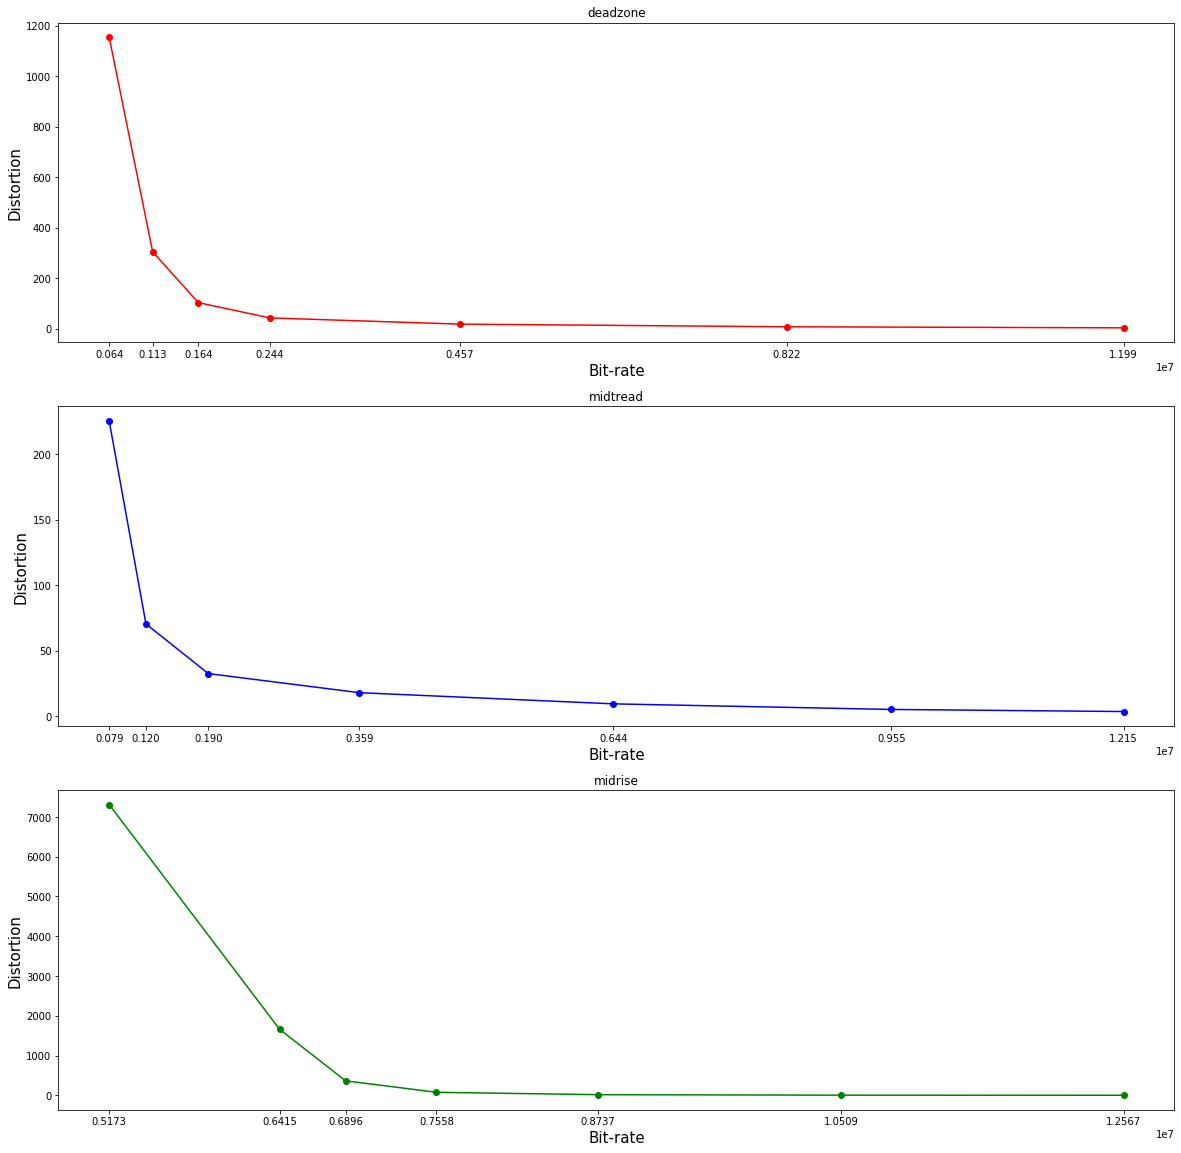

In [96]:
colores={'midtread':"b", "midrise":"g", "deadzone":"r"}
fig=plt.figure(figsize=(20,20))
spec = fig.add_gridspec(ncols=1, nrows=3)
n = 311
for tipo in totales:
    plt.subplot(n)
    plot = plt.plot([i[0] for i in totales[tipo]],[i[1] for i in totales[tipo]],'-bo', color=colores[tipo],label =totales[tipo], linestyle='-')
    plt.xticks([i[0] for i in totales[tipo]])
    plt.ylabel("Distortion", fontsize = 15, color = 'black')
    plt.xlabel("Bit-rate", fontsize = 15, color = 'black')
    plt.title(tipo)
    n+=1

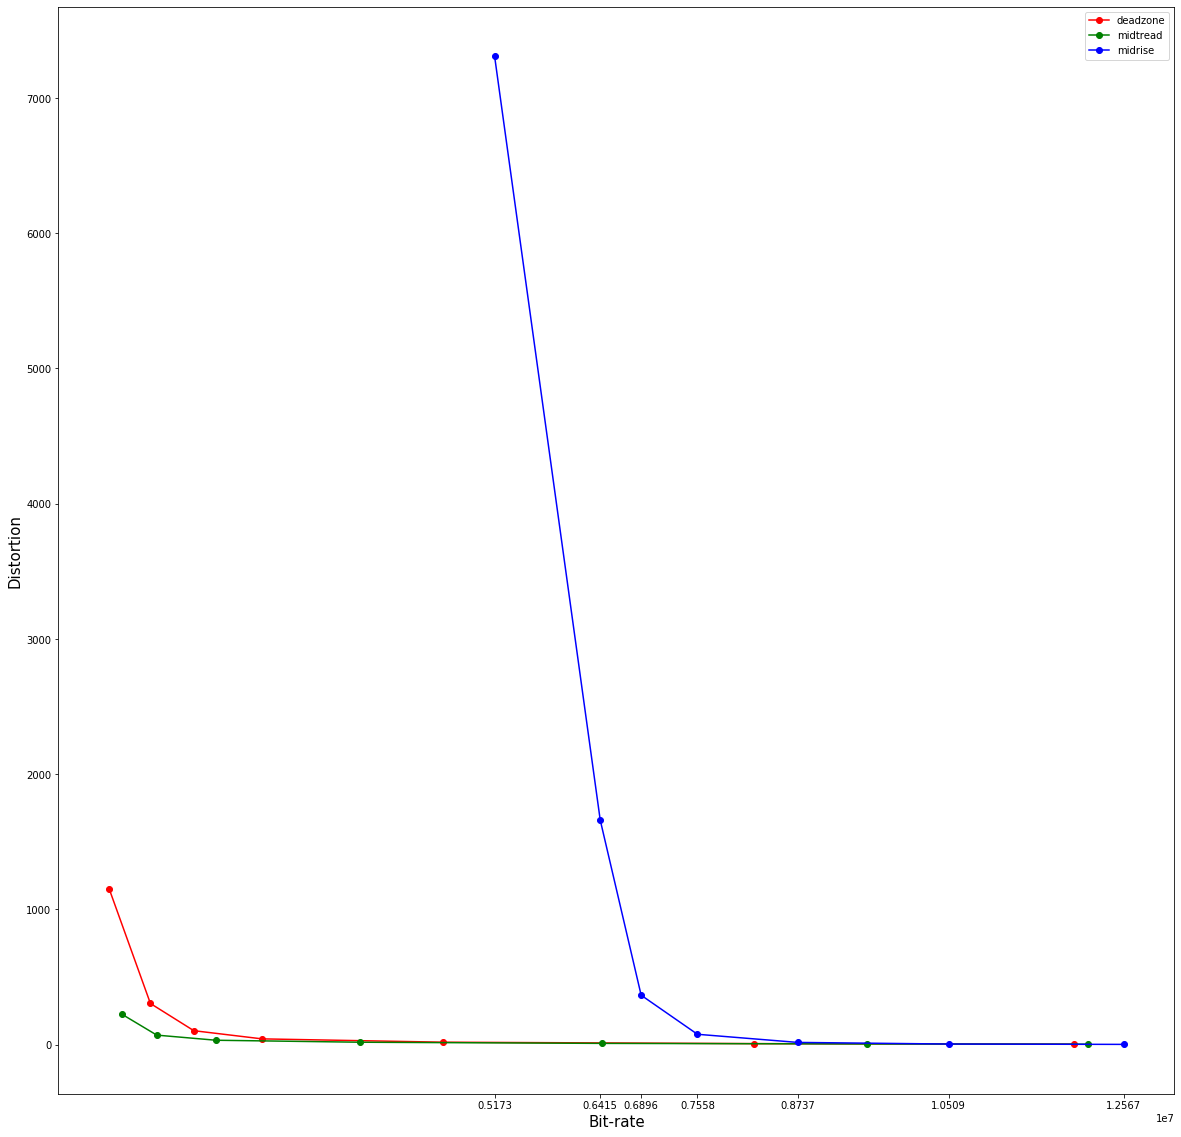

In [97]:
colores={'midrise':"b", "midtread":"g", "deadzone":"r"}
fig=plt.figure(figsize=(20,20))
spec = fig.add_gridspec(ncols=1, nrows=3)
for tipo in totales:
    plot = plt.plot([i[0] for i in totales[tipo]],[i[1] for i in totales[tipo]],'-bo', color=colores[tipo],label=str(tipo), linestyle='-')
    plt.xticks([i[0] for i in totales[tipo]])
plt.ylabel("Distortion", fontsize = 15, color = 'black')
plt.xlabel("Bit-rate", fontsize = 15, color = 'black')
plt.legend(loc="upper right")
plt.show()